In [78]:
import numpy as np
import matplotlib.pyplot as plt

def Absorption_model(num_photons, path_length, epsilon_A, conc_A, epsilon_B, conc_B, dx):
    steps = int(path_length / dx)

    # Linear attenuation coefficients
    mu_A = epsilon_A * conc_A
    mu_B = epsilon_B * conc_B
    mu_total = mu_A + mu_B

    # Total absorption probability per step
    prob_abs = 1 - np.exp(-mu_total * dx)

    photons_alive = np.ones(num_photons, dtype=bool)
    distances = np.zeros(num_photons)

    absorption_profile_A = np.zeros(steps)
    absorption_profile_B = np.zeros(steps)

    for step in range(steps):
        rand_nums = np.random.rand(num_photons)

        # Absorption condition
        absorbed = (rand_nums < prob_abs) & photons_alive

        # Store where absorption occurred
        distances[absorbed] = step * dx

        # Use rand_nums of absorbed photons to assign species
        rand_absorbed = rand_nums[absorbed]
        # Normalize within [0, prob_abs]
        scaled = rand_absorbed / prob_abs  # Now in [0, 1]

        # Assign species based on relative contribution
        prob_A_fractional_abs = mu_A / mu_total if mu_total > 0 else 0
        prob_A_fractional_abs = mu_B / mu_total if mu_total > 0 else 0
        absorbed_A_mask = scaled < prob_A_fractional_abs
        absorbed_B_mask = ~absorbed_A_mask

        absorption_profile_A[step] += np.sum(absorbed_A_mask)
        absorption_profile_B[step] += np.sum(absorbed_B_mask)

        # Mark absorbed photons as no longer alive
        photons_alive[absorbed] = False

    distances[photons_alive] = path_length

    transmitted = np.sum(photons_alive)
    transmission = transmitted / num_photons
    absorbance = -np.log10(transmission)

    return absorbance, distances, absorption_profile_A, absorption_profile_B, transmission


In [79]:
def absorbance_ideal( num_photons,path_length, epsilon_A, conc_A, epsilon_B, conc_B,dx):

    """This function takes the molar extinction coefficients and concentration of each species in a solution
    and the number of photons incident upon that solution, and plots out the Absorbance and transmission of each species
    along the solution's length.

    """

    steps = int(path_length / dx)

    # Linear attenuation coefficients
    mu_A = epsilon_A * conc_A
    mu_B = epsilon_B * conc_B
    mu_total = mu_A + mu_B

    mu_A_fractional=mu_A/mu_total
    mu_B_fractional=mu_B/mu_total

    #Initializes different Arrays
    Transmission_A=[]
    Absorbance_A=[]
    Transmission_B=[]
    Absorbance_B=[]
    step_length=[]
    Photons_absorbed_A=[]
    Photons_absorbed_B=[]


    for step in range(steps):
        step_length.append(step*dx)
        Absorbance_A.append(mu_A_fractional*step*dx)
        Absorbance_B.append(mu_B_fractional*step*dx)
        Transmission_A.append(10**(-Absorbance_A[step]))
        Transmission_B.append(10**(-Absorbance_B[step]))
        Photons_absorbed_A.append(num_photons*(1-Transmission_A[step]))
        Photons_absorbed_B.append(num_photons*(1-Transmission_B[step]))
    # Calculate absorbance for each species and total
    #species_absorbance = np.outer(concentrations * absorptivities, x)  # shape (num_species, num_points)
    #total_absorbance = np.sum(species_absorbance, axis=0)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(step_length, Absorbance_A, label='Absorbance of A', linewidth=2)
    plt.plot(step_length, Absorbance_B, label='Absorbance of A', linewidth=2)
    plt.xlabel('Path Length (cm)')
    plt.ylabel('Dimensionless')
    plt.title('Aborbance and Transmission in ideal case')
    plt.plot(step_length, Transmission_A, label='Transmission of A', linewidth=2)
    plt.plot(step_length, Transmission_B, label='Transmission of B', linewidth=2)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 5))
    plt.plot(step_length, Photons_absorbed_A, label='Total Absorbance', linewidth=2)
    plt.plot(step_length, Photons_absorbed_B, label='Total Absorbance', linewidth=2)
    plt.xlabel('Path Length (cm)')
    plt.ylabel('Absorbed')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

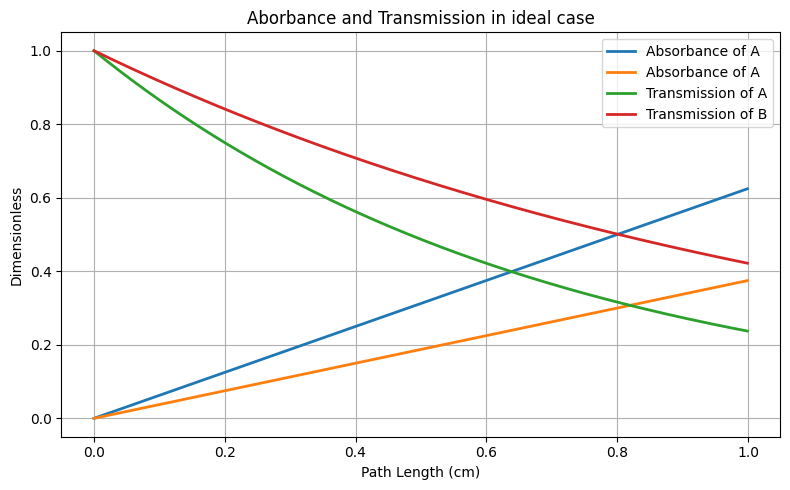

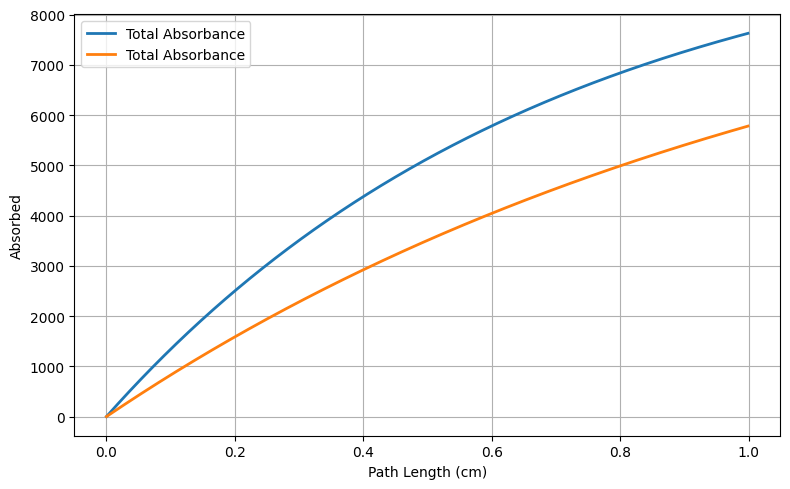

In [80]:
num_photons = 10000            # Number of photons to simulate               # Molar extinction coefficient (L·mol⁻¹·cm⁻¹)
path_length = 1
epsilon_A = 3000.0  # L/(mol*cm)
conc_A = 0.005  # mol/L
epsilon_B = 3000                            ##Situation where A has higher concentration than B
conc_B = 0.003
dx = 0.001

absorbance_ideal( num_photons, path_length, epsilon_A, conc_A, epsilon_B, conc_B,dx)

<ipython-input-78-8a239b4aa5fe>:51: RuntimeWarning: divide by zero encountered in log10
  absorbance = -np.log10(transmission)


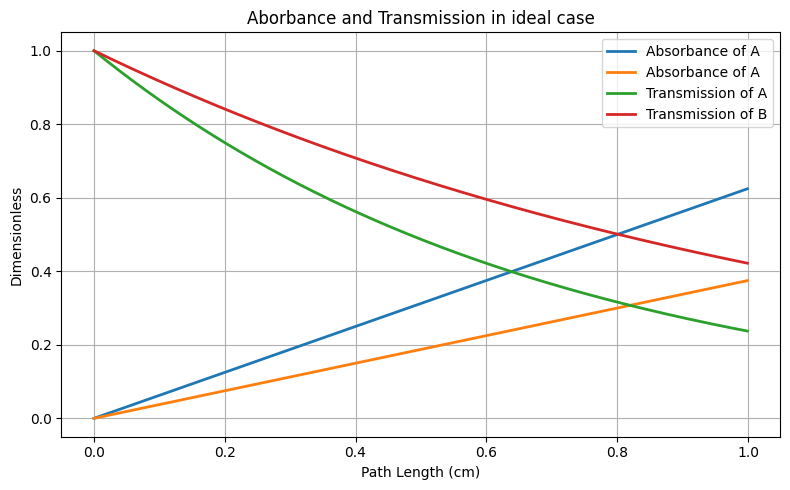

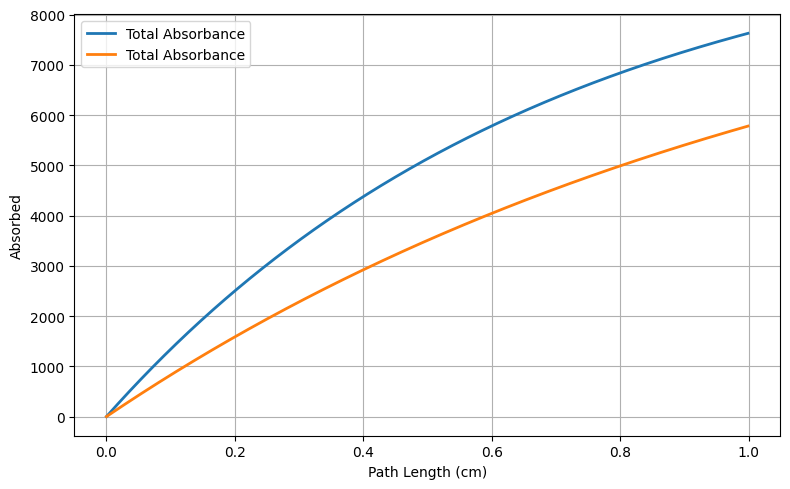

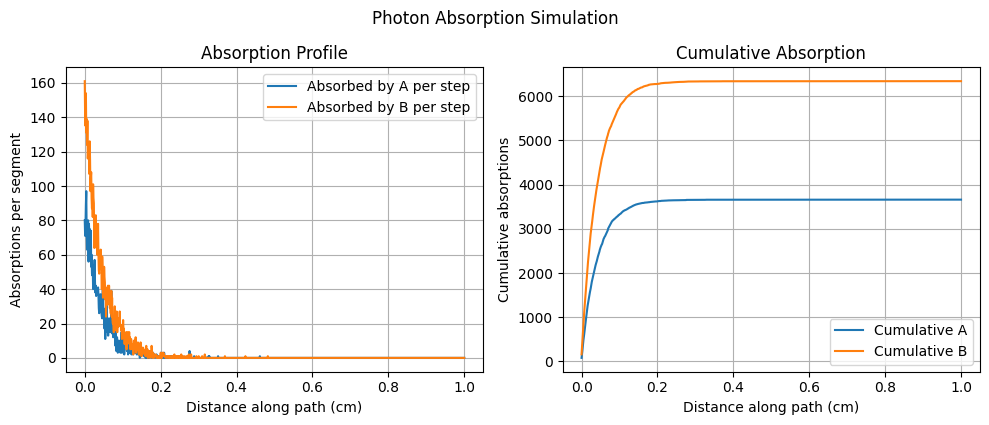

Total number of photons absorbed by A is for is:  3660.0
Total number of photons absorbed by B is for is:  6340.0
Total number of photons accounted for is:  10000.0


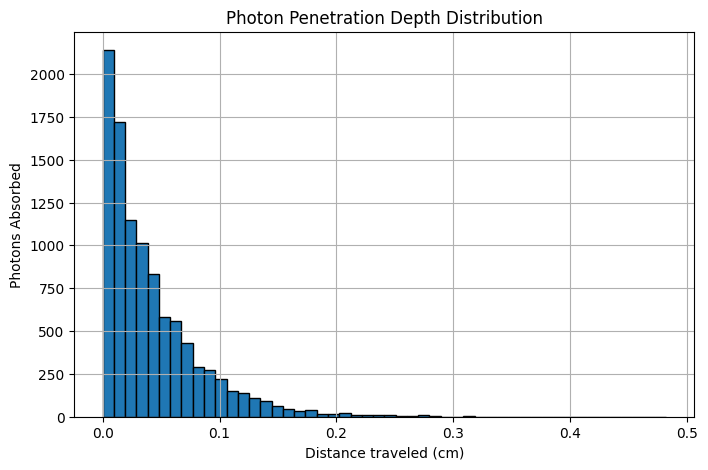

In [81]:
# Example usage
if __name__ == "__main__":
    num_photons = 10000            # Number of photons to simulate               # Molar extinction coefficient (L·mol⁻¹·cm⁻¹)
    path_length = 1
    epsilon_A = 3000.0  # L/(mol*cm)
    conc_A = 0.005  # mol/L
    epsilon_B = 3000                            ##Situation where A has higher concentration than B
    conc_B = 0.003
    dx = 0.001

    absorbance, distances, profile_A, profile_B,transmission = Absorption_model(
    num_photons, path_length, epsilon_A, conc_A, epsilon_B, conc_B, dx
    )
    absorbance_ideal( num_photons, path_length, epsilon_A, conc_A, epsilon_B, conc_B,dx)
    cumulative_A = np.cumsum(profile_A)
    cumulative_B = np.cumsum(profile_B)
    x = np.linspace(0, path_length, len(profile_A))

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(x, profile_A, label='Absorbed by A per step')
    plt.plot(x, profile_B, label='Absorbed by B per step')
    plt.xlabel("Distance along path (cm)")
    plt.ylabel("Absorptions per segment")
    plt.title("Absorption Profile")
    plt.legend()
    plt.grid(True)

    # Plot: Cumulative absorption
    plt.subplot(1, 2, 2)
    plt.plot(x, cumulative_A, label='Cumulative A')
    plt.plot(x, cumulative_B, label='Cumulative B')
    plt.xlabel("Distance along path (cm)")
    plt.ylabel("Cumulative absorptions")
    plt.title("Cumulative Absorption")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.suptitle(f"Photon Absorption Simulation", y=1.05)
    plt.show()


    print("Total number of photons absorbed by A is for is: ", cumulative_A.max() )
    print("Total number of photons absorbed by B is for is: ", cumulative_B.max() )

    """This takes the absorbance model for 10000 photons
    and runs how far the photon population is able to propagate """


    print("Total number of photons accounted for is: ", num_photons-transmission )
    plt.figure(figsize=(8, 5))
    plt.hist(distances, bins=50, edgecolor='black', density=False)
    plt.title("Photon Penetration Depth Distribution")
    plt.xlabel("Distance traveled (cm)")
    plt.ylabel("Photons Absorbed")
    plt.grid(True)
    plt.show()


<ipython-input-78-8a239b4aa5fe>:51: RuntimeWarning: divide by zero encountered in log10
  absorbance = -np.log10(transmission)


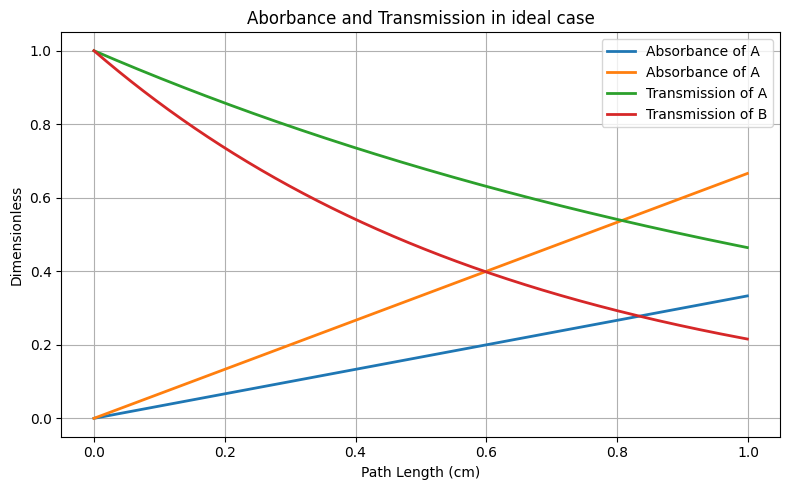

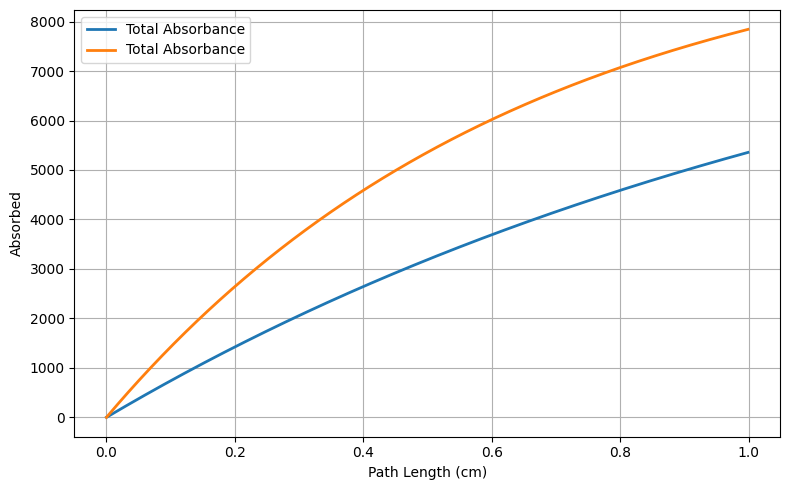

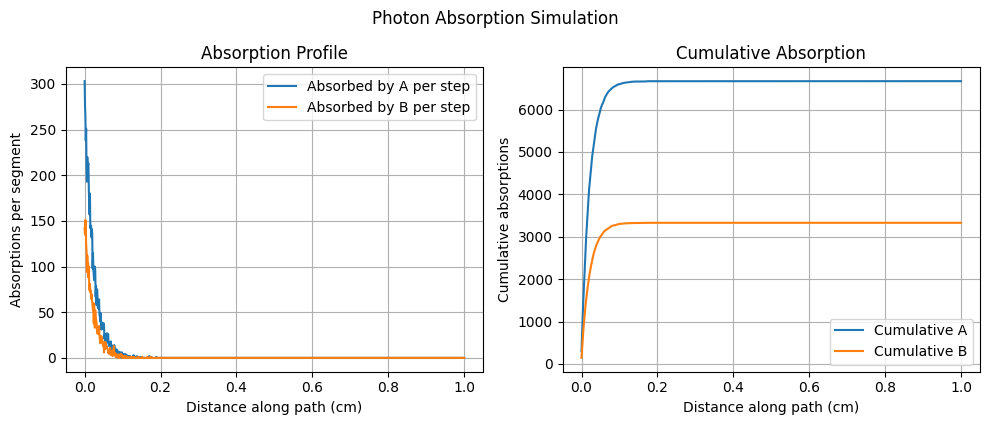

Total number of photons absorbed by A is for is:  6671.0
Total number of photons absorbed by B is for is:  3329.0
Total number of photons accounted for is:  10000.0


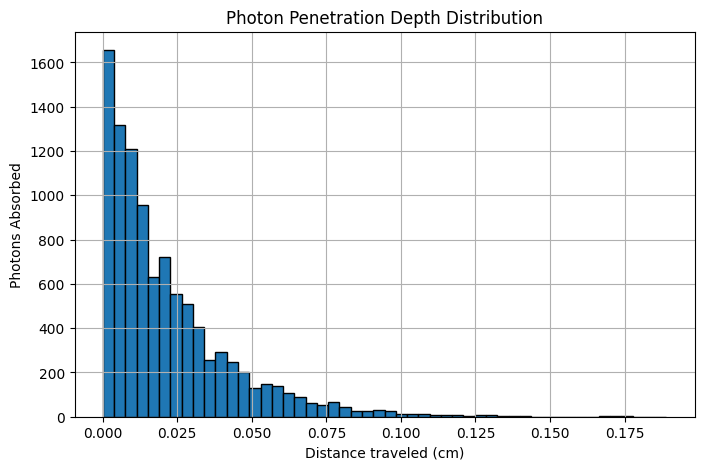

In [82]:
if __name__ == "__main__":
    num_photons = 10000            # Number of photons to simulate               # Molar extinction coefficient (L·mol⁻¹·cm⁻¹)        # Concentration of solute (mol·L⁻¹)
    path_length = 1
    epsilon_A = 3000.0  # L/(mol*cm)
    conc_A = 0.005  # mol/L                     ##Situation where B has higher concentration than A
    epsilon_B = 3000
    conc_B = 0.010
    dx = 0.001

    absorbance, distances, profile_A, profile_B,transmission = Absorption_model(
    num_photons, path_length, epsilon_A, conc_A, epsilon_B, conc_B, dx
    )
    absorbance_ideal( num_photons, path_length, epsilon_A, conc_A, epsilon_B, conc_B,dx)
    cumulative_A = np.cumsum(profile_A)
    cumulative_B = np.cumsum(profile_B)
    x = np.linspace(0, path_length, len(profile_A))

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(x, profile_A, label='Absorbed by A per step')
    plt.plot(x, profile_B, label='Absorbed by B per step')
    plt.xlabel("Distance along path (cm)")
    plt.ylabel("Absorptions per segment")
    plt.title("Absorption Profile")
    plt.legend()
    plt.grid(True)

    # Plot: Cumulative absorption
    plt.subplot(1, 2, 2)
    plt.plot(x, cumulative_A, label='Cumulative A')
    plt.plot(x, cumulative_B, label='Cumulative B')
    plt.xlabel("Distance along path (cm)")
    plt.ylabel("Cumulative absorptions")
    plt.title("Cumulative Absorption")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.suptitle(f"Photon Absorption Simulation", y=1.05)
    plt.show()


    print("Total number of photons absorbed by A is for is: ", cumulative_A.max() )
    print("Total number of photons absorbed by B is for is: ", cumulative_B.max() )

    """This takes the absorbance model for 10000 photons
    and runs how far the photon population is able to propagate """


    print("Total number of photons accounted for is: ", num_photons-transmission )
    plt.figure(figsize=(8, 5))
    plt.hist(distances, bins=50, edgecolor='black', density=False)
    plt.title("Photon Penetration Depth Distribution")
    plt.xlabel("Distance traveled (cm)")
    plt.ylabel("Photons Absorbed")
    plt.grid(True)
    plt.show()



<ipython-input-78-8a239b4aa5fe>:51: RuntimeWarning: divide by zero encountered in log10
  absorbance = -np.log10(transmission)


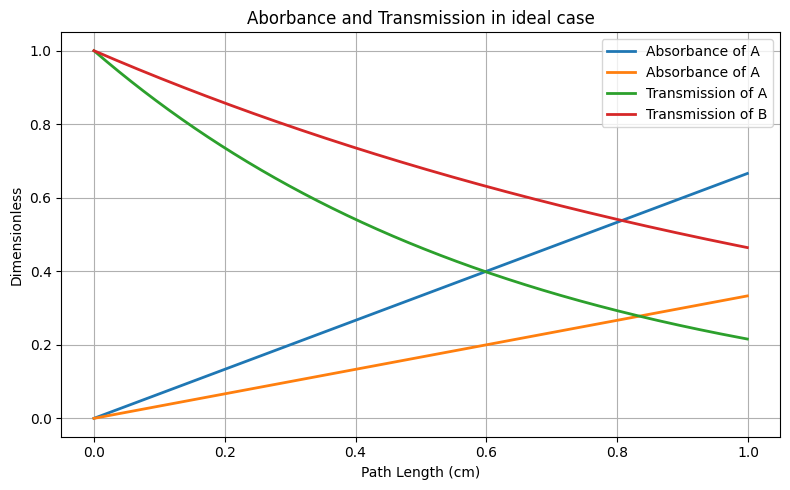

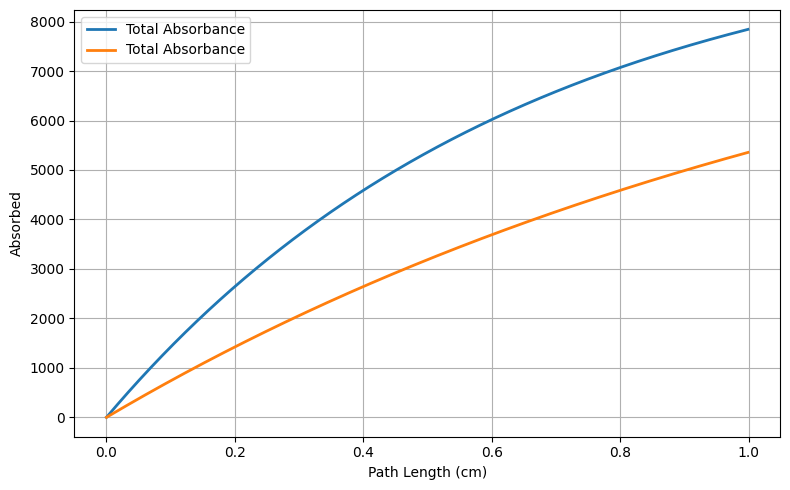

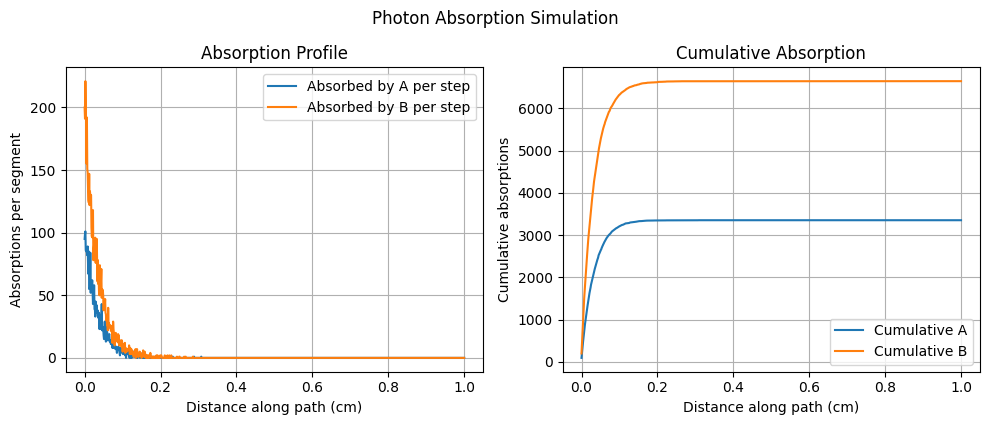

Total number of photons absorbed by A is for is:  3354.0
Total number of photons absorbed by B is for is:  6646.0
Total number of photons accounted for is:  10000.0


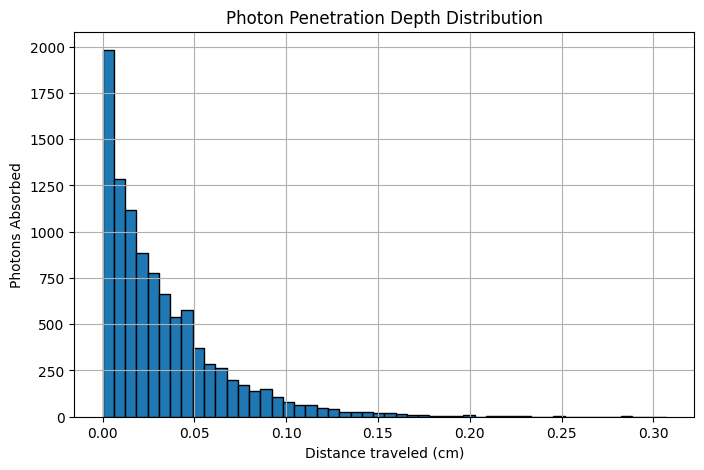

In [83]:
if __name__ == "__main__":
    num_photons = 10000            # Number of photons to simulate               # Molar extinction coefficient (L·mol⁻¹·cm⁻¹)
    path_length = 1
    epsilon_A = 4000.0  # L/(mol*cm)
    conc_A = 0.005  # mol/L                     ##Situation where A has much higher extinction coefficient than B
    epsilon_B = 2000
    conc_B = 0.005
    dx = 0.001

    absorbance, distances, profile_A, profile_B,transmission = Absorption_model(
    num_photons, path_length, epsilon_A, conc_A, epsilon_B, conc_B, dx
    )
    absorbance_ideal( num_photons, path_length, epsilon_A, conc_A, epsilon_B, conc_B,dx)
    cumulative_A = np.cumsum(profile_A)
    cumulative_B = np.cumsum(profile_B)
    x = np.linspace(0, path_length, len(profile_A))

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(x, profile_A, label='Absorbed by A per step')
    plt.plot(x, profile_B, label='Absorbed by B per step')
    plt.xlabel("Distance along path (cm)")
    plt.ylabel("Absorptions per segment")
    plt.title("Absorption Profile")
    plt.legend()
    plt.grid(True)

    # Plot: Cumulative absorption
    plt.subplot(1, 2, 2)
    plt.plot(x, cumulative_A, label='Cumulative A')
    plt.plot(x, cumulative_B, label='Cumulative B')
    plt.xlabel("Distance along path (cm)")
    plt.ylabel("Cumulative absorptions")
    plt.title("Cumulative Absorption")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.suptitle(f"Photon Absorption Simulation", y=1.05)
    plt.show()


    print("Total number of photons absorbed by A is for is: ", cumulative_A.max() )
    print("Total number of photons absorbed by B is for is: ", cumulative_B.max() )

    """This takes the absorbance model for 10000 photons
    and runs how far the photon population is able to propagate """


    print("Total number of photons accounted for is: ", num_photons-transmission )
    plt.figure(figsize=(8, 5))
    plt.hist(distances, bins=50, edgecolor='black', density=False)
    plt.title("Photon Penetration Depth Distribution")
    plt.xlabel("Distance traveled (cm)")
    plt.ylabel("Photons Absorbed")
    plt.grid(True)
    plt.show()

